To perform a thorough exploratory data analysis (EDA) on the `application_train.csv` file for building a credit risk model, we will proceed with the following steps:

1. **Load the Data**: Read the `application_train.csv` and `HomeCredit_columns_description.csv` files into dataframes to explore their contents.

2. **Understand the Metadata**: Use `HomeCredit_columns_description.csv` to understand what each column in `application_train.csv` represents.

3. **Preliminary Data Inspection**: 
    - Check the shape of the dataset.
    - View the first few rows to understand the structure and contents.
    - Check for duplicate entries.

4. **Data Cleaning**: 
    - Handle missing values.
    - Correct data types if necessary.

5. **Statistical Summary**: 
    - Describe the dataset to get an overview of the distributions and statistics of the features.

6. **Target Variable Analysis**: 
    - Analyze the distribution of the `TARGET` variable.

7. **Feature Analysis**: 
    - Analyze the distributions and relationships of the features with the target.
    - Perform univariate analysis.
    - Perform bivariate analysis.

8. **Correlation Analysis**: 
    - Check the correlation of features with the target and among themselves.

9. **Missing Values Analysis**: 
    - Identify the columns with missing values.
    - Determine the best strategy for handling missing data.

10. **Outlier Detection**: 
    - Detect and handle outliers in the dataset.

11. **Feature Engineering**: 
    - Create new features if applicable.

12. **Data Visualization**: 
    - Use visualizations to better understand the data.

13. **Prepare a Summary of Findings**: 
    - Compile the insights obtained from the EDA.

Let's begin by loading the data and getting a preliminary overview. We'll start with the `application_train.csv` dataset and then look at the column descriptions from `HomeCredit_columns_description.csv`.

The `application_train.csv` dataset contains 122 columns, indicating a rich set of features that can be used for building a credit risk model. The `TARGET` column, which is our label, indicates if a client has payment difficulties (1) or not (0).

From the `HomeCredit_columns_description.csv`, we see that it contains descriptions for each column, which will be useful to understand the data better.

Here is a preview of the first few rows from both files:

**`application_train.csv` (first 5 rows of selected columns):**
- `SK_ID_CURR`: ID of loan in the sample.
- `TARGET`: Target variable (1 - client with payment difficulties, 0 - otherwise).
- `NAME_CONTRACT_TYPE`, `CODE_GENDER`, `FLAG_OWN_CAR`, etc.: Various features describing the loan and client characteristics.

**`HomeCredit_columns_description.csv` (first 5 rows):**
- Descriptions for `SK_ID_CURR`, `TARGET`, `NAME_CONTRACT_TYPE`, `CODE_GENDER`, `FLAG_OWN_CAR`, and so on.

Before diving deeper into the EDA, let's perform a preliminary data inspection to check for duplicates and get an overview of missing values, data types, and basic statistics. We'll also check the balance of the `TARGET` variable to see the distribution of classes.

Here are the preliminary findings from the `application_train.csv` dataset:

- The dataset contains 307,511 entries and 122 columns.
- There are no duplicate entries based on the unique ID (`SK_ID_CURR`).
- Some columns have a significant amount of missing values, with the top missing value columns being related to common area information, nonliving apartments, and other specifics of living conditions.
- The `TARGET` variable shows an imbalance in the class distribution, with approximately 92% of entries belonging to class 0 (no payment difficulties) and 8% to class 1 (payment difficulties).

Basic statistical summary:
- The count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max values are provided for numeric features.
- For instance, the `AMT_INCOME_TOTAL` shows a wide range of income, from a minimum of 25,650 to a maximum of 117,000,000, with a mean income of around 168,797. This indicates potential outliers in income that may need further investigation.
- There are a few columns with a large number of zeros, which could be flags or indicators (e.g., `FLAG_DOCUMENT_X` series).

To proceed, we'll focus on the following steps:

1. Analyze the distribution and potential impact of missing values.
2. Examine the `TARGET` variable more closely, potentially using visualizations.
3. Investigate the statistical properties of the dataset, including detecting outliers.
4. Explore the correlations between the features, especially in relation to the `TARGET` variable.
5. Consider the need for feature engineering or transformations based on the distributions of variables.


In [22]:
import gc  # Garbage collector interface
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import seaborn as sns  # For advanced plotting
import warnings  # To handle warnings

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import LinearSVC

# It's best to remove plotly and cufflinks if you are not using them in the script, as they can be heavy imports.
# If you need them, uncomment the following lines:
# import plotly.offline as py
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
# import cufflinks as cf
# cf.go_offline()

# Same for LightGBM; only import if you're using it
# import lightgbm as lgb

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
# Load the application data
application_train_path = './home-credit-default-risk/application_train.csv'
application_train_df = pd.read_csv(application_train_path)

# Display the first few rows of the application data and the columns description
application_train_df.shape


(307511, 122)

In [61]:
application_train_df.DAYS_EMPLOYED.max()

365243

In [78]:
temp = application_train_df[application_train_df.DAYS_EMPLOYED > 0] 

In [79]:
temp.shape

(252134, 122)

In [80]:
temp.DAYS_EMPLOYED.max()

-2

In [70]:
temp.DAYS_EMPLOYED.unique()

array([365243])

In [52]:
temp = pd.read_csv("./home-credit-default-risk/HomeCredit_columns_description.csv", encoding = "latin")
temp

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [10]:
# Preliminary data inspection

# Check the shape of the dataset
data_shape = application_train_df.shape

# Check for duplicate entries based on the unique ID
duplicate_entries = application_train_df.duplicated(subset='SK_ID_CURR').sum()

# Check for missing values
missing_values = application_train_df.isnull().sum().sort_values(ascending=False)

# Check the balance of the TARGET variable
target_balance = application_train_df['TARGET'].value_counts(normalize=True)

# Get basic statistics
basic_stats = application_train_df.describe()

(data_shape, duplicate_entries, missing_values.head(20), target_balance, basic_stats)


((307511, 122),
 0,
 COMMONAREA_MEDI             214865
 COMMONAREA_AVG              214865
 COMMONAREA_MODE             214865
 NONLIVINGAPARTMENTS_MODE    213514
 NONLIVINGAPARTMENTS_AVG     213514
 NONLIVINGAPARTMENTS_MEDI    213514
 FONDKAPREMONT_MODE          210295
 LIVINGAPARTMENTS_MODE       210199
 LIVINGAPARTMENTS_AVG        210199
 LIVINGAPARTMENTS_MEDI       210199
 FLOORSMIN_AVG               208642
 FLOORSMIN_MODE              208642
 FLOORSMIN_MEDI              208642
 YEARS_BUILD_MEDI            204488
 YEARS_BUILD_MODE            204488
 YEARS_BUILD_AVG             204488
 OWN_CAR_AGE                 202929
 LANDAREA_MEDI               182590
 LANDAREA_MODE               182590
 LANDAREA_AVG                182590
 dtype: int64,
 TARGET
 0    0.919271
 1    0.080729
 Name: proportion, dtype: float64,
           SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
 count  307511.000000  307511.000000  307511.000000      3.075110e+05   
 mean   278180.518577     

In [28]:
df_train = application_train_df.copy()

In [29]:
# Create new features in the DataFrame
df_train = df_train.assign(
    # Flag for erroneous 'DAYS_EMPLOYED' values and replace them with NaN
    DAYS_EMPLOYED_ERROR = df_train["DAYS_EMPLOYED"] == 365243,
    DAYS_EMPLOYED = lambda x: x['DAYS_EMPLOYED'].replace(365243, np.nan),
    # Flag when total income is greater than credit
    INCOME_GT_CREDIT_FLAG = df_train['AMT_INCOME_TOTAL'] > df_train['AMT_CREDIT'],
    # New features related to income, credit, annuity, and employment
    CREDIT_INCOME_PERCENT = lambda x: x['AMT_CREDIT'] / x['AMT_INCOME_TOTAL'],
    ANNUITY_INCOME_PERCENT = lambda x: x['AMT_ANNUITY'] / x['AMT_INCOME_TOTAL'],
    CREDIT_TERM = lambda x: x['AMT_CREDIT'] / x['AMT_ANNUITY'],
    DAYS_EMPLOYED_PERCENT = lambda x: x['DAYS_EMPLOYED'] / x['DAYS_BIRTH'],
)

# Display the shape of the updated DataFrame
print(f'The shape of application data: {df_train.shape}')

The shape of application data: (307511, 128)


In [56]:
bureau = pd.read_csv("./home-credit-default-risk/bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [48]:
bureau.CREDIT_CURRENCY.unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [58]:
# Function to prefix columns and merge with main DataFrame
def merge_bureau_features(df_main, bureau, prefix, agg_func, on='SK_ID_CURR'):
    grp = bureau.groupby(on).agg(agg_func).reset_index()
    grp.columns = [f'{prefix}{column}' if column != on else column for column in grp.columns]
    df_main = df_main.merge(grp, on=on, how='left').fillna(0)
    return df_main

# Combining numerical features
numeric_columns = bureau.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('SK_ID_BUREAU')  # Exclude ID
application_bureau = merge_bureau_features(
    df_train, bureau[numeric_columns], 
    'BUREAU_', {col: 'mean' for col in numeric_columns if col != 'SK_ID_CURR'}
)

# Combining categorical features
categorical_columns = bureau.select_dtypes(exclude=[np.number, 'datetime']).columns.tolist()
bureau_categorical = pd.get_dummies(bureau[categorical_columns])
bureau_categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
application_bureau = merge_bureau_features(
    application_bureau, bureau_categorical, 
    'BUREAU_', 'sum'
)

print('The shape of application and bureau data combined:', application_bureau.shape)



The shape of application and bureau data combined: (307511, 163)


In [59]:
application_bureau.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ERROR,INCOME_GT_CREDIT_FLAG,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT,BUREAU_DAYS_CREDIT,BUREAU_CREDIT_DAY_OVERDUE,BUREAU_DAYS_CREDIT_ENDDATE,BUREAU_DAYS_ENDDATE_FACT,BUREAU_AMT_CREDIT_MAX_OVERDUE,BUREAU_CNT_CREDIT_PROLONG,BUREAU_AMT_CREDIT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT,BUREAU_AMT_CREDIT_SUM_LIMIT,BUREAU_AMT_CREDIT_SUM_OVERDUE,BUREAU_DAYS_CREDIT_UPDATE,BUREAU_AMT_ANNUITY,BUREAU_CREDIT_ACTIVE_Active,BUREAU_CREDIT_ACTIVE_Bad debt,BUREAU_CREDIT_ACTIVE_Closed,BUREAU_CREDIT_ACTIVE_Sold,BUREAU_CREDIT_CURRENCY_currency 1,BUREAU_CREDIT_CURRENCY_currency 2,BUREAU_CREDIT_CURRENCY_currency 3,BUREAU_CREDIT_CURRENCY_currency 4,BUREAU_CREDIT_TYPE_Another type of loan,BUREAU_CREDIT_TYPE_Car loan,BUREAU_CREDIT_TYPE_Cash loan (non-earmarked),BUREAU_CREDIT_TYPE_Consumer credit,BUREAU_CREDIT_TYPE_Credit card,BUREAU_CREDIT_TYPE_Interbank credit,BUREAU_CREDIT_TYPE_Loan for business development,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending),BUREAU_CREDIT_TYPE_Loan for the purchase of equipment,BUREAU_CREDIT_TYPE_Loan for working capital replenishment,BUREAU_CREDIT_TYPE_Microloan,BUREAU_CREDIT_TYPE_Mobile operator loan,BUREAU_CREDIT_TYPE_Mortgage,BUREAU_CREDIT_TYPE_Real estate loan,BUREAU_CREDIT_TYPE_Unknown type of loan
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6

In [60]:
# Function to create and merge additional features
def create_bureau_ratios(bureau, application_bureau):
    bureau = bureau.fillna(0)
    # Ratios and sum calculations
    debt_credit_ratio = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum() / bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
    overdue_debt_ratio = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum() / bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
    
    # Replace infinite values with zeros and convert to float32
    debt_credit_ratio = debt_credit_ratio.replace([np.inf, -np.inf], 0).astype('float32')
    overdue_debt_ratio = overdue_debt_ratio.replace([np.inf, -np.inf], 0).astype('float32')
    
    # Merge with main DataFrame
    application_bureau = application_bureau.merge(debt_credit_ratio.rename('DEBT_CREDIT_RATIO').reset_index(), on='SK_ID_CURR', how='left')
    application_bureau = application_bureau.merge(overdue_debt_ratio.rename('OVERDUE_DEBT_RATIO').reset_index(), on='SK_ID_CURR', how='left')
    
    # Fill NaN values resulted from the join
    application_bureau['DEBT_CREDIT_RATIO'] = application_bureau['DEBT_CREDIT_RATIO'].fillna(0)
    application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau['OVERDUE_DEBT_RATIO'].fillna(0)
    
    return application_bureau

# Apply function to create and merge ratios
application_bureau = create_bureau_ratios(bureau, application_bureau)

# Print the shape of the combined DataFrame
print('The shape of application and bureau data combined:', application_bureau.shape)


The shape of application and bureau data combined: (307511, 165)


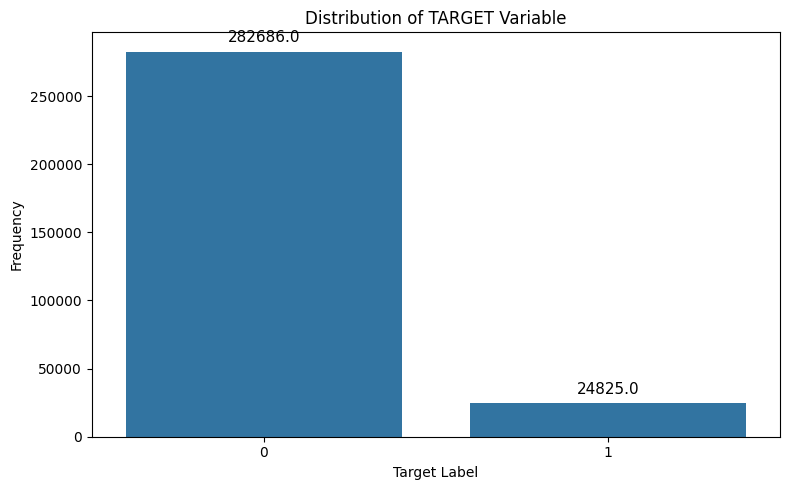

In [12]:
# Visualizing the distribution of the TARGET variable
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=application_train_df)
plt.title('Distribution of TARGET Variable')
plt.xlabel('Target Label')
plt.ylabel('Frequency')

# Adding annotations to show the counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                       textcoords='offset points')

plt.tight_layout()
plt.show()


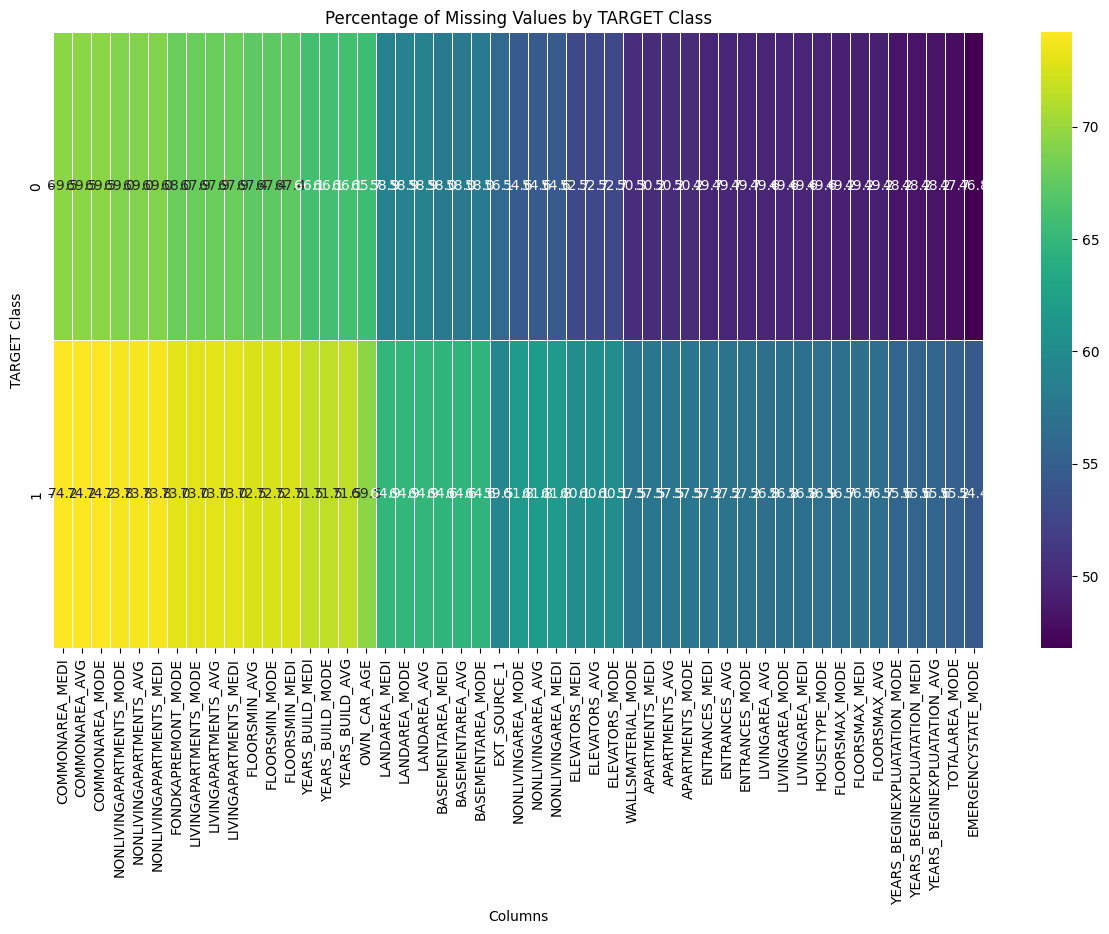

In [13]:
# Filtering the columns with more than 40% missing values for detailed analysis
high_missing_columns = missing_values_percent[missing_values_percent > 40].index

# Calculating the percentage of missing values in these columns for each TARGET class
missing_by_target = application_train_df.groupby('TARGET')[high_missing_columns].apply(lambda x: x.isnull().mean() * 100)

# Plotting the results
plt.figure(figsize=(15, 8))
sns.heatmap(missing_by_target, annot=True, fmt=".1f", linewidths=.5, cmap="viridis")
plt.title('Percentage of Missing Values by TARGET Class')
plt.ylabel('TARGET Class')
plt.xlabel('Columns')
plt.show()


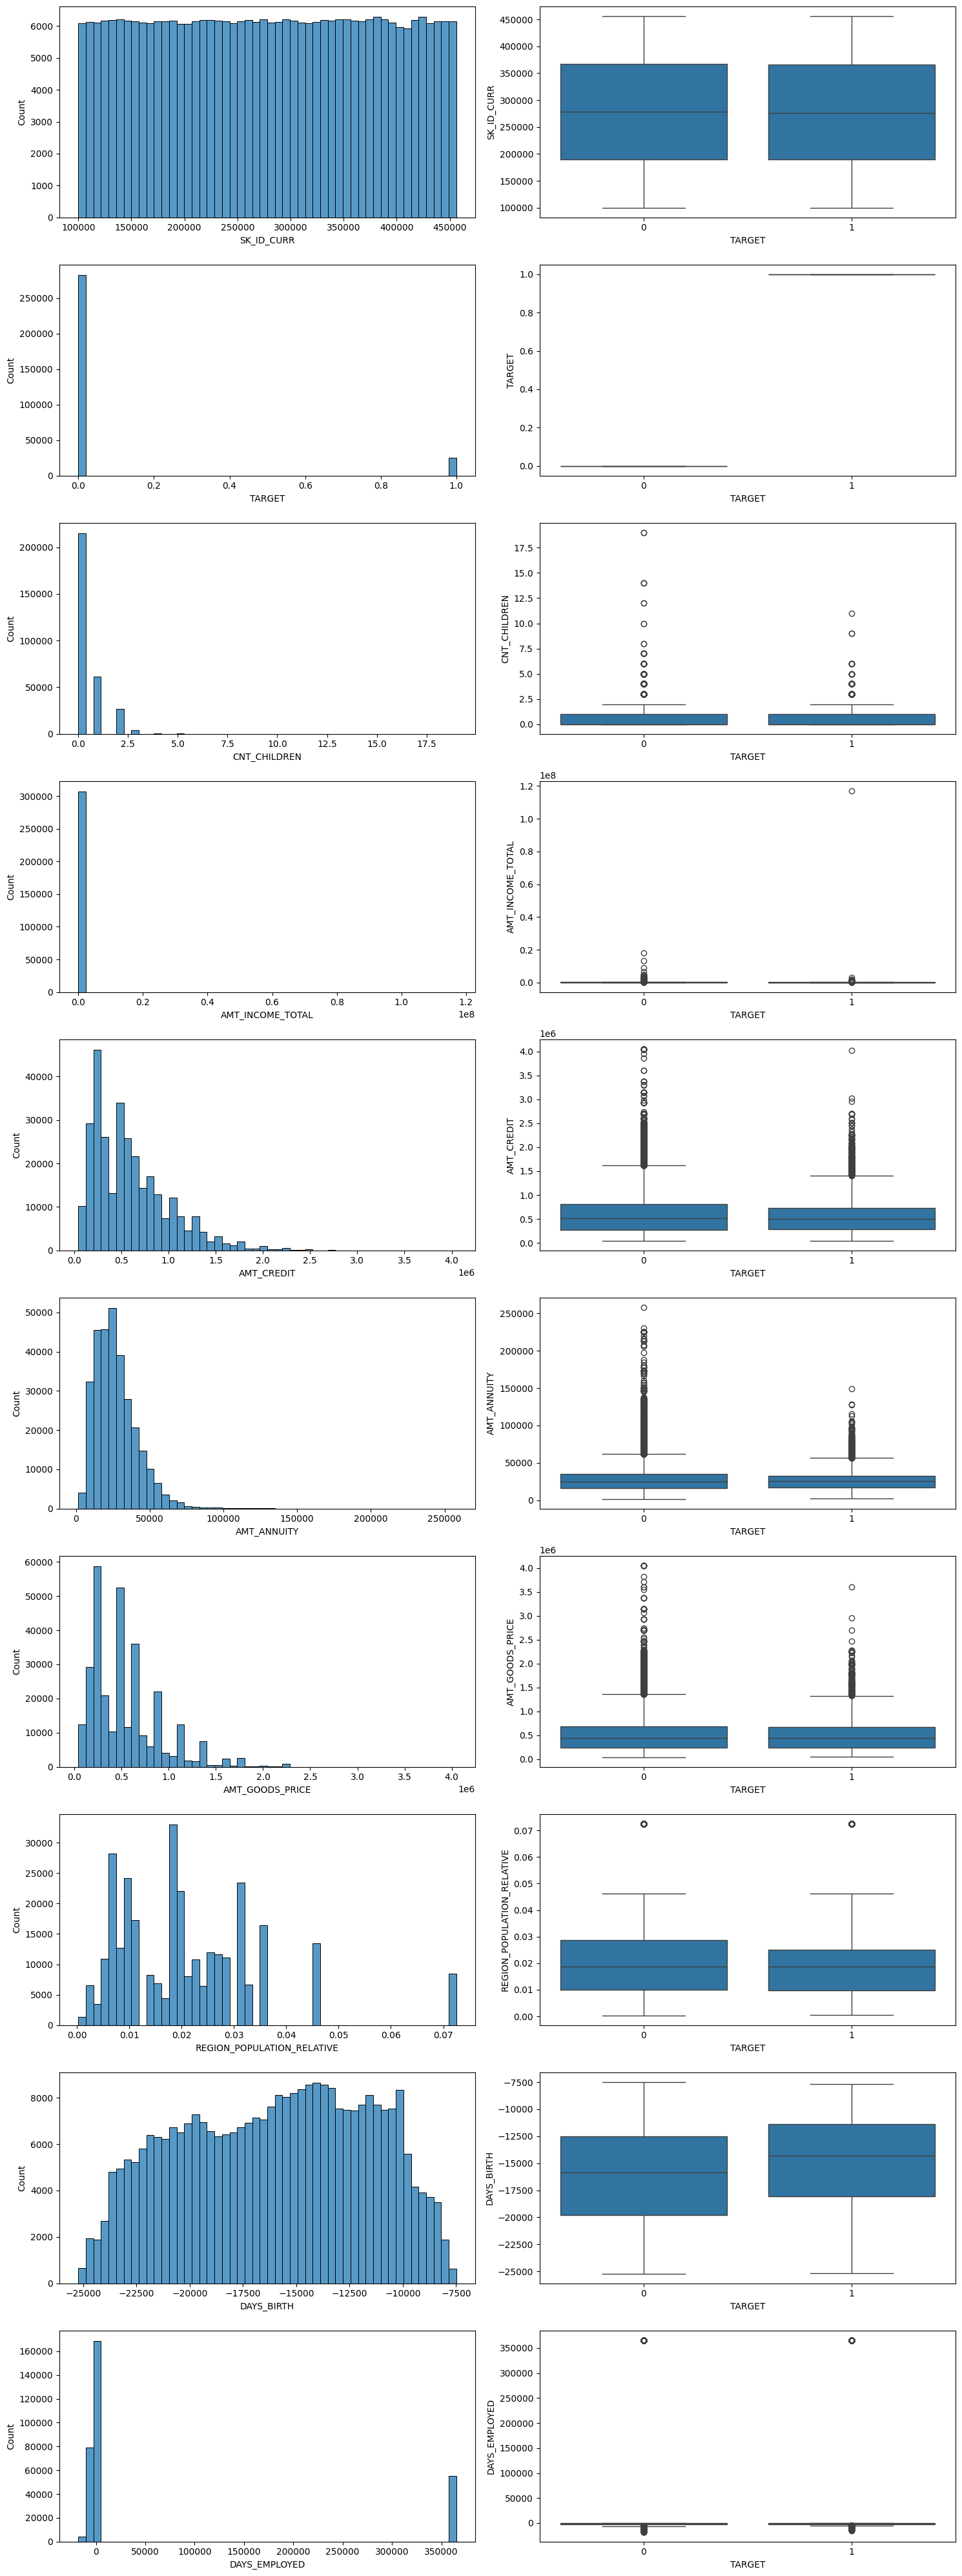

(          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
 count  307511.000000  307511.000000  307511.000000      3.075110e+05   
 mean   278180.518577       0.080729       0.417052      1.687979e+05   
 std    102790.175348       0.272419       0.722121      2.371231e+05   
 min    100002.000000       0.000000       0.000000      2.565000e+04   
 25%    189145.500000       0.000000       0.000000      1.125000e+05   
 50%    278202.000000       0.000000       0.000000      1.471500e+05   
 75%    367142.500000       0.000000       1.000000      2.025000e+05   
 max    456255.000000       1.000000      19.000000      1.170000e+08   
 
          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
 count  3.075110e+05  307499.000000     3.072330e+05   
 mean   5.990260e+05   27108.573909     5.383962e+05   
 std    4.024908e+05   14493.737315     3.694465e+05   
 min    4.500000e+04    1615.500000     4.050000e+04   
 25%    2.700000e+05   16524.000000     2.385000e+05   
 50% 

In [14]:
# Identifying numerical and categorical features
numerical_features = application_train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = application_train_df.select_dtypes(include=['object']).columns.tolist()

# Summary statistics of numerical features
numerical_summary = application_train_df[numerical_features].describe()

# Analyzing the distribution of numerical features with respect to the TARGET variable
# For the sake of brevity and performance, we will select a subset of numerical features to analyze
sample_numerical_features = numerical_features[:10]  # Selecting first 10 features for demonstration

# Plotting distributions of the sample numerical features with respect to TARGET
fig, axes = plt.subplots(nrows=len(sample_numerical_features), ncols=2, figsize=(15, 4*len(sample_numerical_features)))
for i, feature in enumerate(sample_numerical_features):
    sns.histplot(application_train_df[feature], bins=50, kde=False, ax=axes[i, 0])
    sns.boxplot(x='TARGET', y=feature, data=application_train_df, ax=axes[i, 1])

plt.tight_layout()
plt.show()

numerical_summary, sample_numerical_features


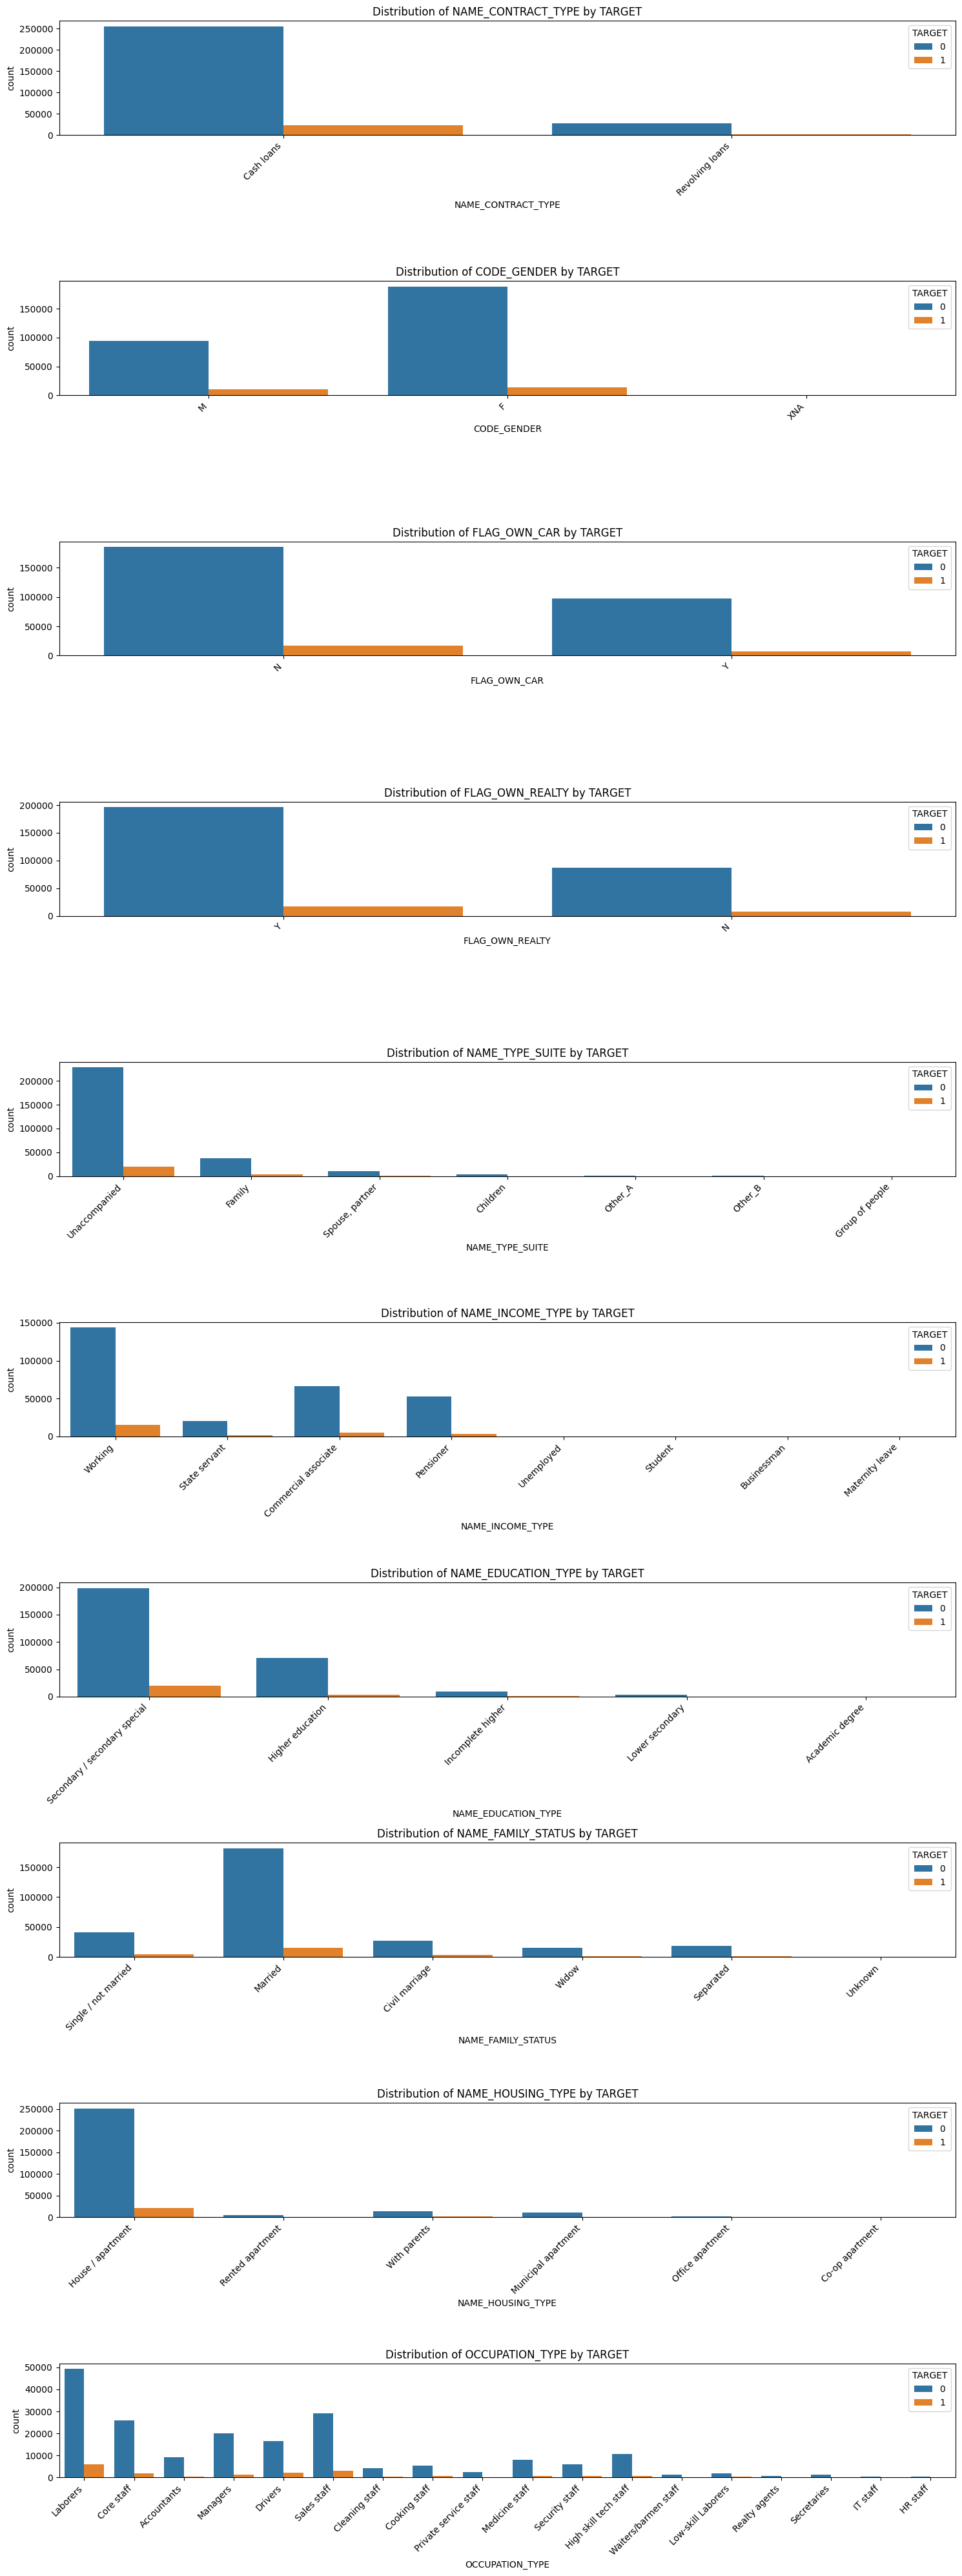

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [15]:
# For demonstration, we'll select a sample of categorical features for analysis
sample_categorical_features = categorical_features[:10]  # Selecting first 10 features for demonstration

# Plotting the distribution of the sample categorical features with respect to TARGET
fig, axes = plt.subplots(nrows=len(sample_categorical_features), ncols=1, figsize=(15, 4*len(sample_categorical_features)))
for i, feature in enumerate(sample_categorical_features):
    sns.countplot(x=feature, hue='TARGET', data=application_train_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by TARGET')
    axes[i].legend(title='TARGET')
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

sample_categorical_features


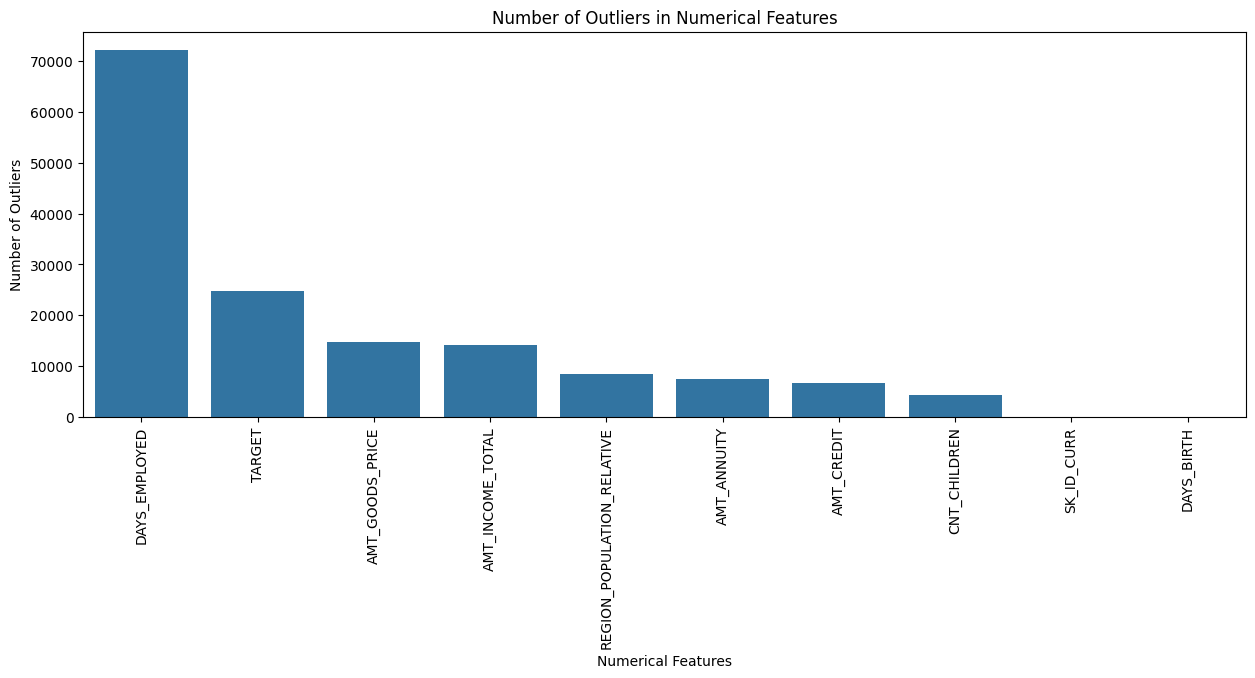

DAYS_EMPLOYED                 72217
TARGET                        24825
AMT_GOODS_PRICE               14728
AMT_INCOME_TOTAL              14035
REGION_POPULATION_RELATIVE     8412
AMT_ANNUITY                    7504
AMT_CREDIT                     6562
CNT_CHILDREN                   4272
SK_ID_CURR                        0
DAYS_BIRTH                        0
dtype: int64

In [16]:
# Outlier detection using the IQR method for the numerical features
# For computational efficiency, we'll focus on the same subset of numerical features as before

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))
    return data.loc[outlier_condition]

# Applying the function to the sample numerical features
outliers_dict = {}
for feature in sample_numerical_features:
    outliers = detect_outliers_iqr(application_train_df, feature)
    outliers_dict[feature] = outliers.shape[0]

# Convert the dictionary to a pandas series for easy visualization
outliers_series = pd.Series(outliers_dict).sort_values(ascending=False)

# Plotting the number of outliers detected in each feature
plt.figure(figsize=(15, 5))
sns.barplot(x=outliers_series.index, y=outliers_series)
plt.xticks(rotation=90)
plt.ylabel('Number of Outliers')
plt.xlabel('Numerical Features')
plt.title('Number of Outliers in Numerical Features')
plt.show()

outliers_series
